# Statistical Analysis and EDA for flight fare

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data set 
train=pd.read_excel("Data_Train.xlsx")

In [3]:
train


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
train.shape

(10683, 11)

In [5]:
#checking for null values
print(train.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [6]:
#drop the missing values 
train=train.dropna()

## Extracting day,month,year,weekday from Date of Journey

In [7]:
train['Journey_Day'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.day
train['Journey_Month'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.month
train['weekday']= pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.weekday

In [8]:
train.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [9]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'weekday'],
      dtype='object')

Converting duration into minutes

In [10]:
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
train['Duration']=train['Duration'].apply(duration)

In [11]:
train['Duration'].nunique()

367

train

Extracting whether its a morning,evening,night or afternoon flight from departure time & arrival time of the flight

In [12]:
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
train['Dep_Time']=train['Dep_Time'].apply(deparrtime)
train['Arrival_Time']=train['Arrival_Time'].apply(deparrtime)

Converting total_stops to 0,1,2,3 and so on..

In [13]:
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
train['Total_Stops']=train['Total_Stops'].apply(stops)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Journey_Day      10682 non-null  int64 
 11  Journey_Month    10682 non-null  int64 
 12  weekday          10682 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [15]:
train["Duration"] = train["Duration"].astype(int)
train["Journey_Day"] = train["Journey_Day"].astype(object)
train["Journey_Month"] = train["Journey_Month"].astype(object)
train["weekday"] = train["weekday"].astype(object)

In [16]:
train["Journey_Month"]

0        3
1        5
2        6
3        5
4        3
        ..
10678    4
10679    4
10680    4
10681    3
10682    5
Name: Journey_Month, Length: 10682, dtype: object

In [17]:
df1 =train.copy()

In [18]:
#assigning month names
df1["Journey_Month"]=df1["Journey_Month"].replace({1:"Jan",2:"Feb",3:"March",4:"April",5:"May",6:"June",7:"Jul",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"}) 

In [19]:
df1["Journey_Month"]=df1["Journey_Month"].astype(object)

In [20]:
df1["Journey_Month"].unique()

array(['March', 'May', 'June', 'April'], dtype=object)

In [21]:
df1

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,170,0,No info,3897,24,March,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,445,2,No info,7662,1,May,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Night,1140,2,No info,13882,9,June,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,325,1,No info,6218,12,May,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,Evening,Night,285,1,No info,13302,1,March,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,Evening,Night,150,0,No info,4107,9,April,1
10679,Air India,Kolkata,Banglore,CCU → BLR,Evening,Night,155,0,No info,4145,27,April,5
10680,Jet Airways,Banglore,Delhi,BLR → DEL,Morning,Afternoon,180,0,No info,7229,27,April,5
10681,Vistara,Banglore,New Delhi,BLR → DEL,Afternoon,Afternoon,160,0,No info,12648,1,March,4


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  int32 
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Journey_Day      10682 non-null  object
 11  Journey_Month    10682 non-null  object
 12  weekday          10682 non-null  object
dtypes: int32(1), int64(1), object(11)
memory usage: 1.1+ MB


[Text(0, 0, 'March'),
 Text(1, 0, 'May'),
 Text(2, 0, 'June'),
 Text(3, 0, 'April')]

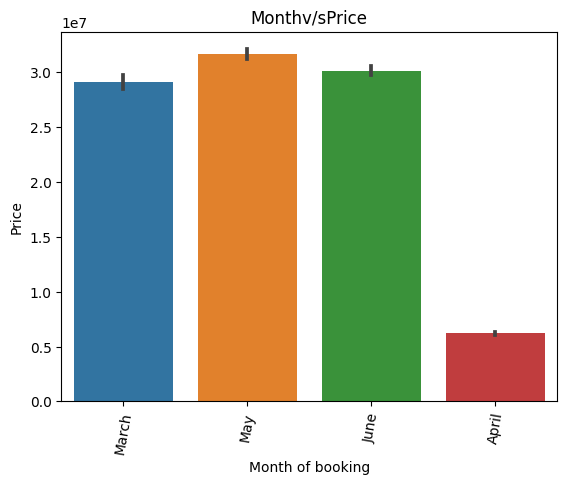

In [23]:
#Journey month v/s total fare
v1=sns.barplot(x='Journey_Month', y='Price', data=df1,estimator=sum)
v1.set_title('Monthv/sPrice')
v1.set_ylabel('Price')
v1.set_xlabel('Month of booking')
v1.set_xticklabels(v1.get_xticklabels(), rotation=80)

In [24]:
#count of flights per month
top_month=df1.Journey_Month.value_counts().head(10)
top_month

May      3465
June     3414
March    2724
April    1079
Name: Journey_Month, dtype: int64

Analysis :

We see that the total count of flight is maximum towards the month-May which can also be concluded from the above bar plot which shows that the sum of fare is maximum in May.


This can be due to : Summer vacations in the month of may for schools/colleges, hence most families are also generally going for vacations around this time.


The count of flights is lowest on the month of April, this can be because : Schools,colleges have their final exams around this time, offices are mostly busy in the month of April as it is the end of Quarter 1

In [25]:
monthly_avg=df1.groupby(['Journey_Month']).agg({'Price':np.mean}).reset_index()

<AxesSubplot: xlabel='Journey_Month'>

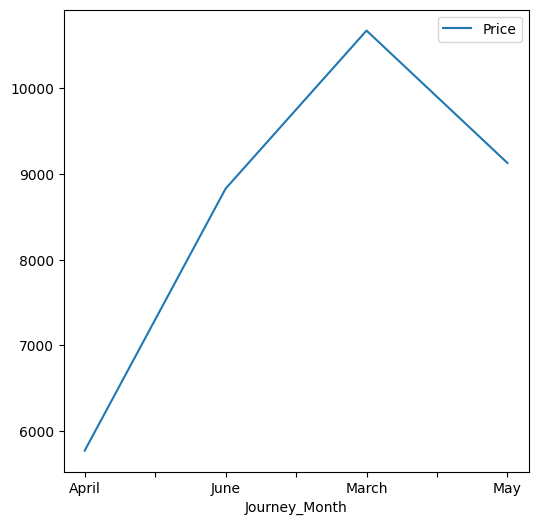

In [26]:
#Journey month v/s Averagefare
monthly_avg.plot(x='Journey_Month',y='Price',figsize=(6,6))

We see that the average fare price is highest the month of March , this can be because people usually book the fights 2-3 months prior to their date of journey which leads to higher demand and hence higher fare prices.(since the count of tickets booked for travelling in May is the most, prior bookings are done in March)

<function matplotlib.pyplot.show(close=None, block=None)>

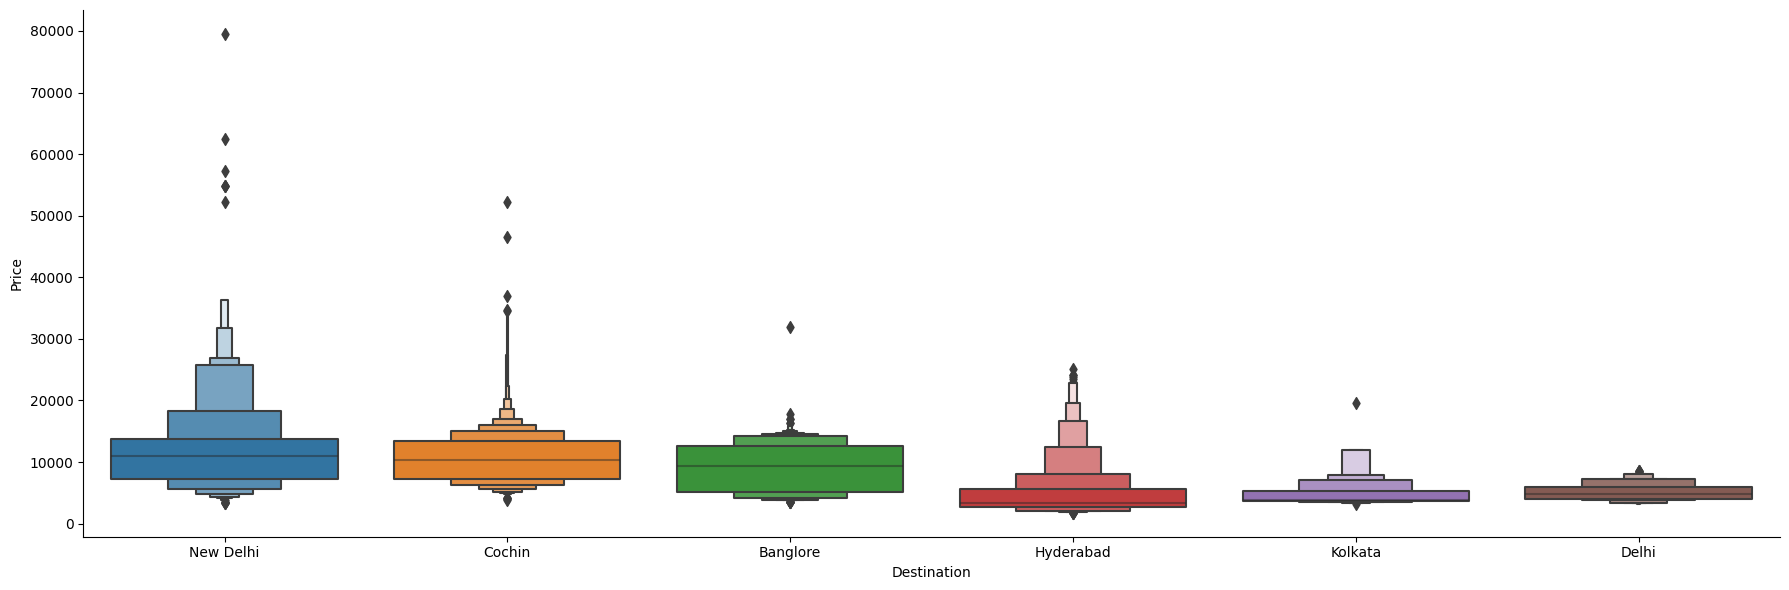

In [27]:
# Destination vs AveragePrice
sns.catplot(y='Price',x='Destination',data= df1.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

The airfare price range in Delhi & New Delhi is the maximum, this can be due to: Jet fuel prices in Delhi had increased in the year of 2018 by 26.4%, it is also the National Capital, political seat of power and a highly visited place for vacations(same for bangalore & cochin)
The same reasoning can be given for higher price range in delhi as the source of the flight

<function matplotlib.pyplot.show(close=None, block=None)>

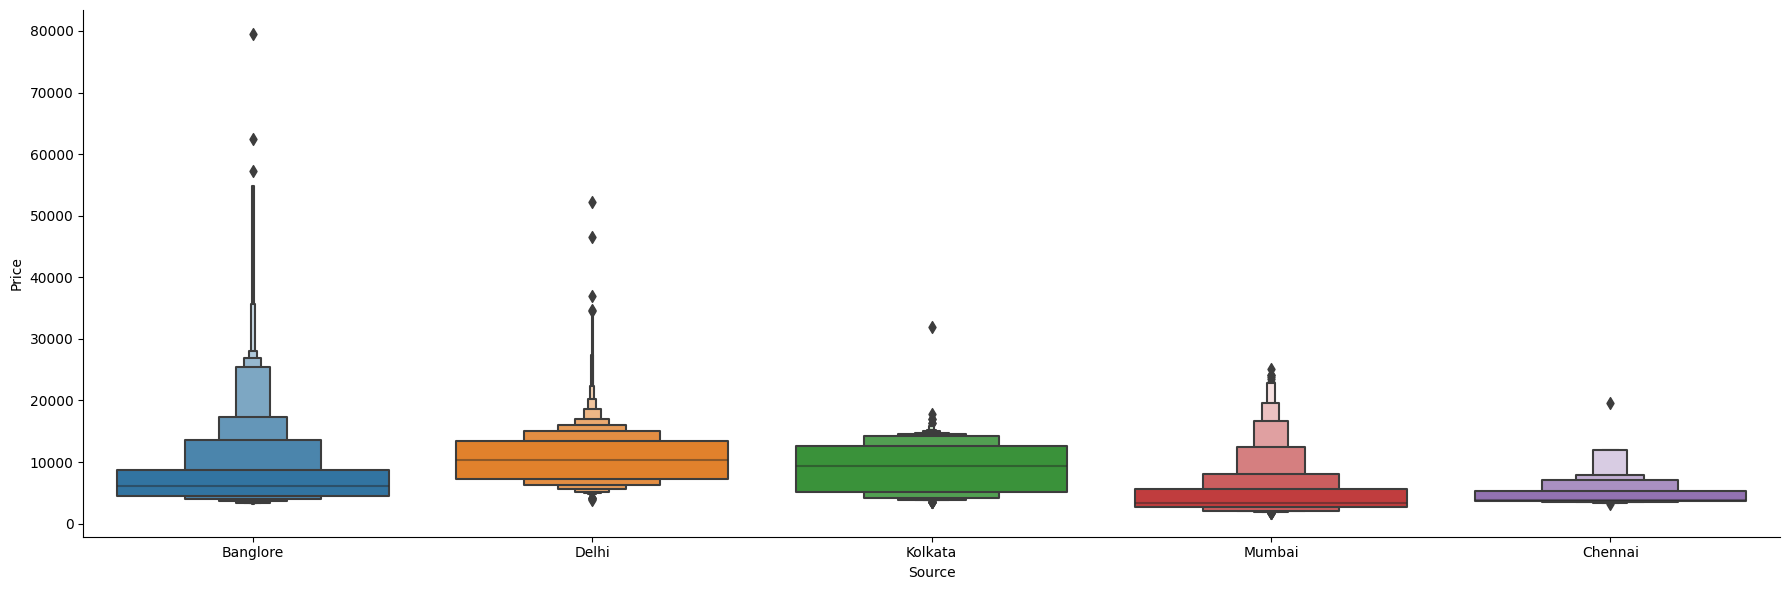

In [28]:
# Source vs AveragePrice
sns.catplot(y='Price',x='Source',data= train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

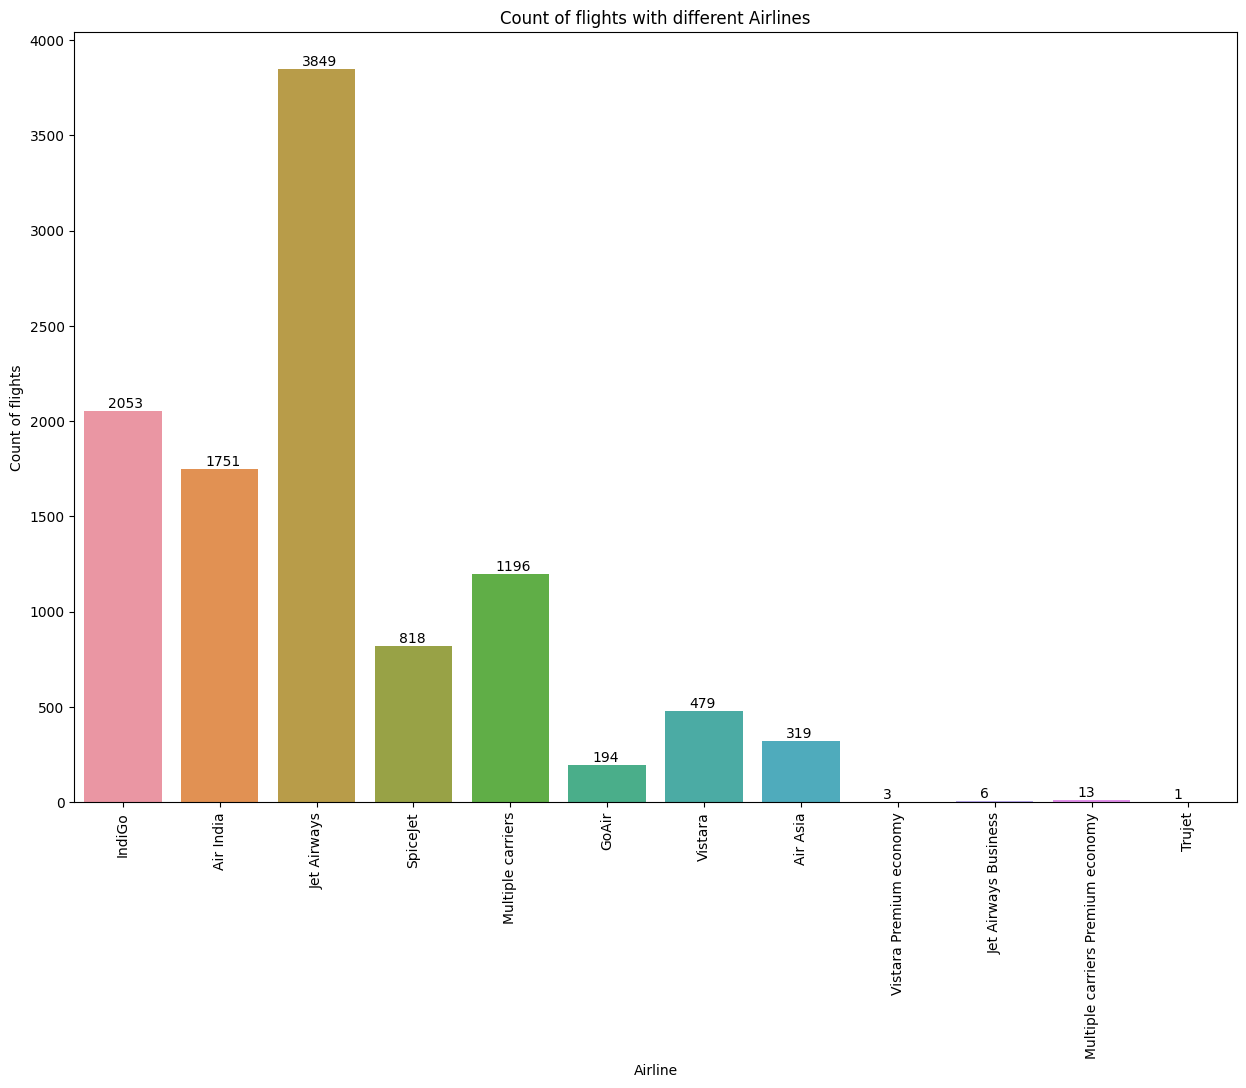

In [29]:
#Count of flights v/s Airline
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

from the diagram below we can see that jet airways Business have the highest price
apart from the first airline almost all are having similar median

<function matplotlib.pyplot.show(close=None, block=None)>

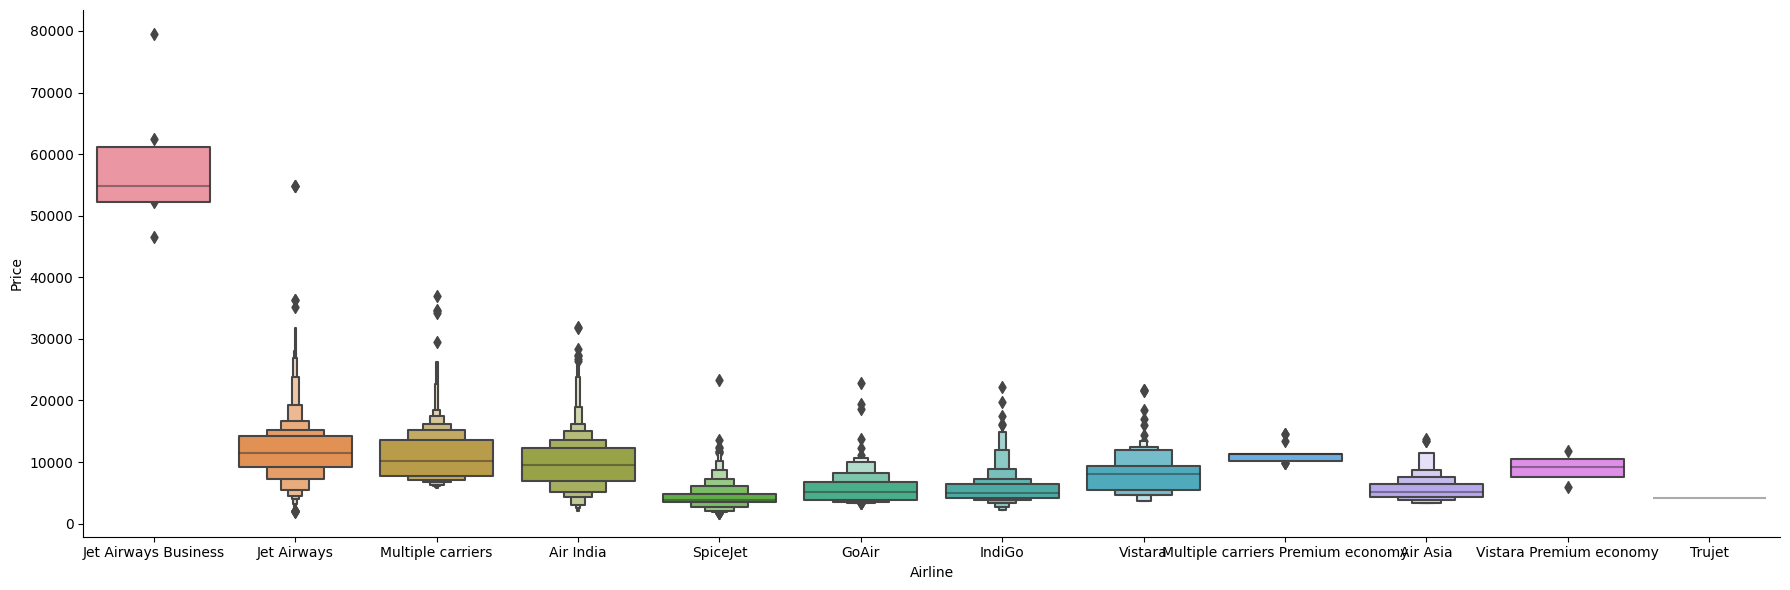

In [30]:
# Airline vs AveragePrice
sns.catplot(y='Price',x='Airline',data= train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Jet airways and Air India are full service airlines are and always highly priced due to various amenities they provide. Low-cost carriers like indigo and spicejet have a lower and similar fare range .

<AxesSubplot: xlabel='Duration', ylabel='Price'>

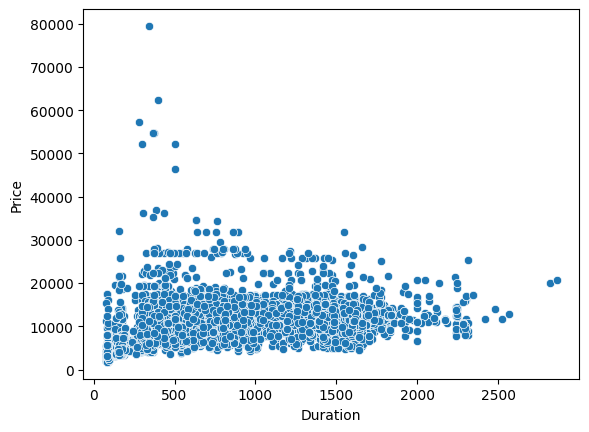

In [31]:
#duration v/s AveragePrice
sns.scatterplot(data=train, x='Duration', y='Price')

We know that duration( or distance) plays a major role in affecting air ticket prices but we see no such pattern here, as there must be there are other significant factors affecting air fare like type of airline, destination of flight, date of journey of flight(higher if collides with a public holiday)

[Text(0, 0, 'Night'),
 Text(1, 0, 'Morning'),
 Text(2, 0, 'Evening'),
 Text(3, 0, 'Afternoon')]

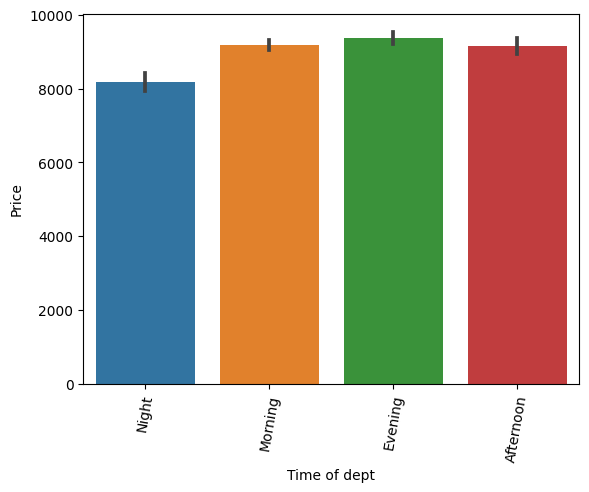

In [32]:
#Deptarure time v/s AveragePrice
v2=sns.barplot(x='Dep_Time', y='Price', data=train)
v2.set_ylabel('Price')
v2.set_xlabel('Time of dept')
v2.set_xticklabels(v2.get_xticklabels(), rotation=80)

In [33]:
# time of departure v/s count of flights
top_time=train.Dep_Time.value_counts().head(10)
top_time

Morning      4331
Evening      2829
Afternoon    2017
Night        1505
Name: Dep_Time, dtype: int64

Early Morning flights are always cheaper and so are midnight flight prices.
Evening flight fares are expensive due to more demand and is the most convenient time to tarvel for most people.

[Text(0, 0, 'Night'),
 Text(1, 0, 'Afternoon'),
 Text(2, 0, 'Morning'),
 Text(3, 0, 'Evening')]

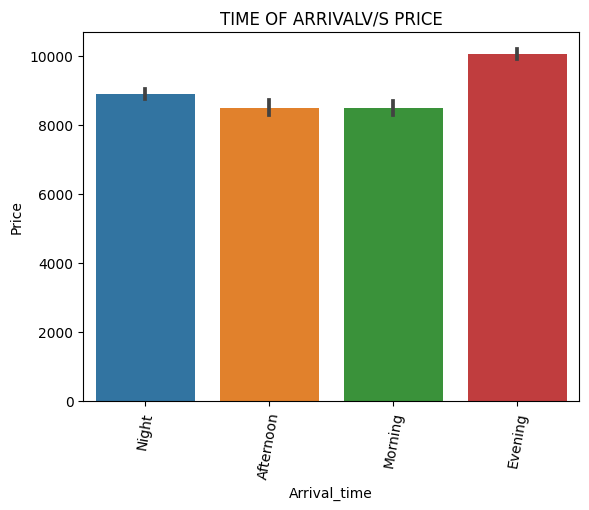

In [34]:
#TIME OF ARRIVAL V/S average price
v3=sns.barplot(x='Arrival_Time', y='Price', data=train)
v3.set_title('TIME OF ARRIVALV/S PRICE')
v3.set_ylabel('Price')
v3.set_xlabel('Arrival_time')
v3.set_xticklabels(v3.get_xticklabels(), rotation=80)

[Text(0, 0, '0'),
 Text(1, 0, '2'),
 Text(2, 0, '1'),
 Text(3, 0, '3'),
 Text(4, 0, '4')]

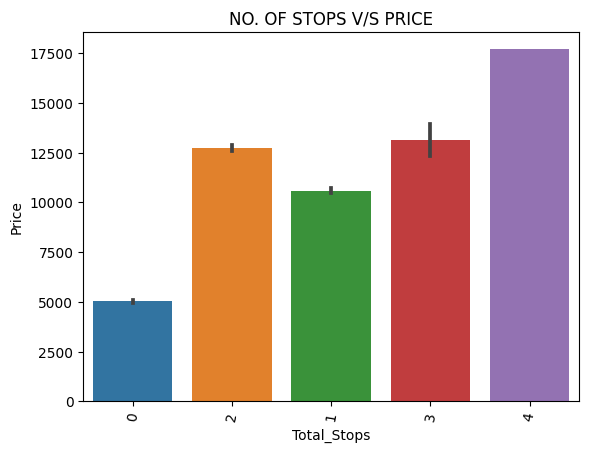

In [35]:
#total stops v/s average price
v4=sns.barplot(x='Total_Stops', y='Price', data=train)
v4.set_title('NO. OF STOPS V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('Total_Stops')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)

As a direct/non-stop flight is accounting for fare of only one flight for a trip, its average fair is the least. As the no. of stops/layovers increase, the fare price goes up accounting for no. of flights and due to other resources being used up for the same

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6')]

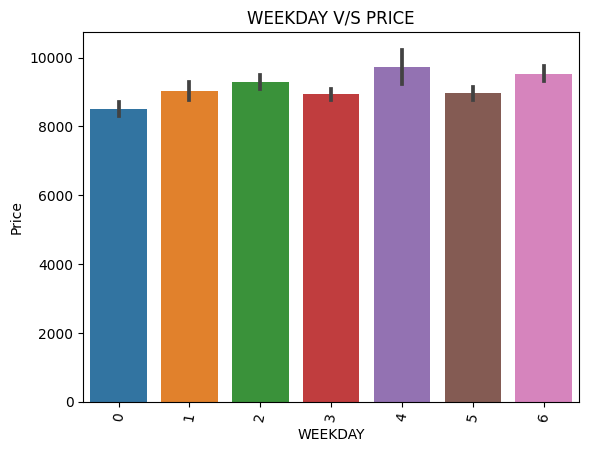

In [36]:
#WEEKDAY V/S average price
v4=sns.barplot(x='weekday', y='Price', data=train)
v4.set_title('WEEKDAY V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('WEEKDAY')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)

We see that prices are highest on a friday, that may be because this is when airlines start raising prices to make up for the lower prices before and also because weekdays are off for most people so they are mostly travelling to or travelling back.

In [37]:
train["Journey_Day"].unique()

array([24, 1, 9, 12, 27, 18, 3, 15, 6, 21], dtype=object)

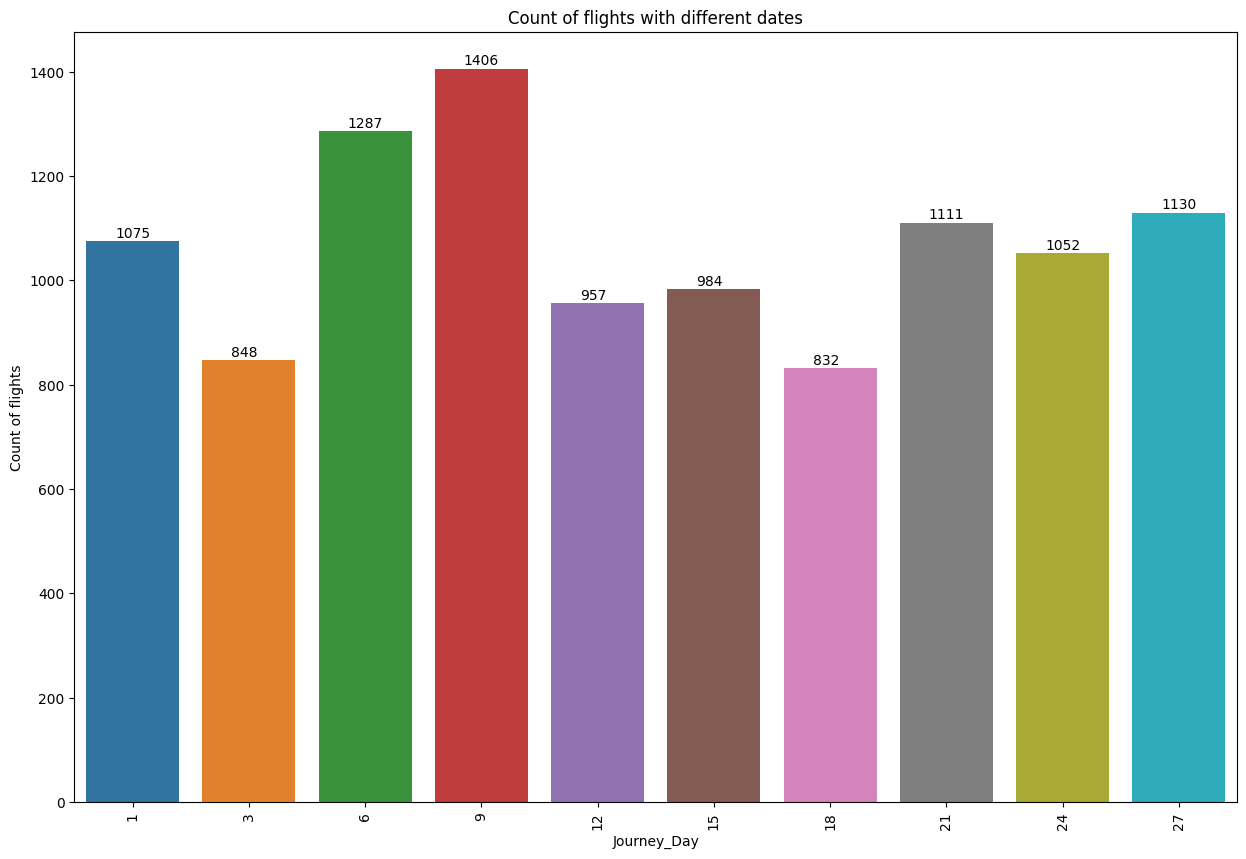

In [38]:
#Count of flights with different dates
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different dates')
ax=sns.countplot(x = 'Journey_Day', data =train)
plt.xlabel('Journey_Day')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

[Text(0, 0, '1'),
 Text(1, 0, '3'),
 Text(2, 0, '6'),
 Text(3, 0, '9'),
 Text(4, 0, '12'),
 Text(5, 0, '15'),
 Text(6, 0, '18'),
 Text(7, 0, '21'),
 Text(8, 0, '24'),
 Text(9, 0, '27')]

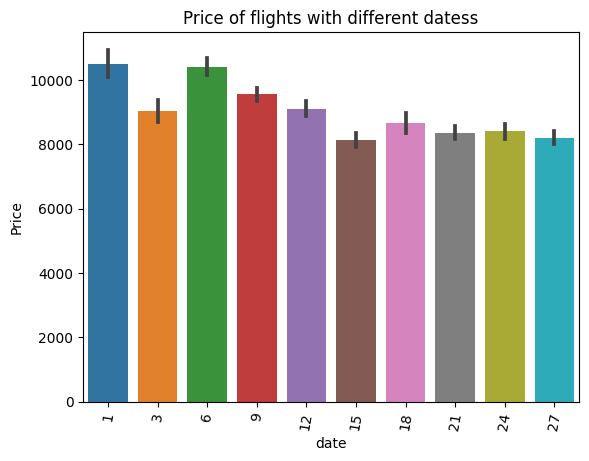

In [39]:
#Journey_Day v/s Average price
v5=sns.barplot(x='Journey_Day', y='Price', data=train)
v5.set_title('Price of flights with different datess')
v5.set_ylabel('Price')
v5.set_xlabel('date')
v5.set_xticklabels(v5.get_xticklabels(), rotation=80)

It looks like that there's a trend in the air fare when compared to the day of respective months, prices are higher in the start of month but this is not a trend if you see from the broader perspective as this might be due to various reasons. For eg. the date of Journey is 10th March and people are booking towards 5th March or so, this will lead to higher flight prices.(Prices increase as near you date of booking is to the date of journey). So flight prices don't follow any particular pattern towards any time of the month.

# Thank You 
